In [4]:
PRFX_ESMB = 'MelInfEsmb0812B3'

In [5]:
from pathlib import Path
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score as roc_auc
import matplotlib.pyplot as plt

class Param: pass

p_esmb = f'../output/{PRFX_ESMB}'; Path(p_esmb).mkdir(exist_ok=True,parents=True)
p_cmp = '../input/siim-isic-melanoma-classification'

# starting weights

In [19]:
# MelInfEsmb0809B1
prfx2wgt0 = {
#     'MelInf0726B2tta16':1.0,
#     'MelInf0805A1tta16':1.0,
    'MelInf0728A1tta16':1.0,
#     'MelInf0728B1tta16':1.0,
#     'MelInf0805C1tta16':1.0,
#     'MelInf0727A1tta16':1.0,
#     'MelInf0805D1tta16':1.0,
    'MelInf0727B1tta16':1.0,
    'MelInf0805E1tta16':1.0,
#     'MelInf0726G2tta16':1.0,
#     'MelInf0726G4tta16':1.0,
    'MelInf0726H2tta16':1.0,
    'MelInf0726H2tta16epc456':1.0,
    'MelInf0729H1tta16':1.0,
    'MelInf0729E1tta16':1.0,
    'MelInf0729D1tta16':1.0,
    'MelInf0806C1tta16':1.0,
    'MelInf0729F1tta16':1.0,
    'MelInf0806D1tta16':1.0,
    'MelInf0729C1tta16':1.0,
    'MelInf0729C1tta16epc456':1.0,
    'Mel0806E1tta16epc345':1.0,
    'MelInf0808A1tta16':1.0,
    'MelInf0729G3tta16epc567':1.0,
    'MelInf0801A1tta16':1.0,
    'MelInf0801B1tta16epc567':1.0,
    'MelInf0801C1tta16':1.0,
    'MelInf0801D2tta16':1.0,
}

In [20]:
prfx2oofs = {}
for prfx in prfx2wgt0.keys():
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    p_prp = f'../output/{param.PRFX_PREP}'
    dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 

    vls=[]
    oofs=[]
    for fld in range(4):
        ep2oof = pickle.load(open(f'{p_out}/ep2oof_{prfx}_fld_{fld}.p', 'rb'))
        _,vl= res['fld2trvl'][fld]
        vls += list(vl)
        ep2oof = np.concatenate(ep2oof, 1)
        oof = ep2oof.mean(1)
        oofs += list(oof)

    ys = dftrn.target.iloc[vls]
    sortedzip = sorted(zip(vls, oofs, ys))
    _, oofs, ys = list(zip(*sortedzip))
    assert np.all(dftrn.target==ys)

    oofs = np.array(oofs)
    prfx2oofs[prfx] = oofs
    
    scr = roc_auc(ys, oofs)
    print(param.ARCH, param.SZ, f'{scr:.4f}', end=' ')
    
    idx20 = np.where(dftrn.source==20)[0]
    scr20 = roc_auc(dftrn.target.iloc[idx20], oofs[idx20])
    print(f'{scr20:.4f}', prfx2wgt0[prfx], prfx)

efficientnet-b1 224 0.9301 0.9082 1.0 MelInf0728A1tta16
efficientnet-b4 224 0.9318 0.9094 1.0 MelInf0727B1tta16
efficientnet-b4 224 0.9312 0.9103 1.0 MelInf0805E1tta16
efficientnet-b6 224 0.9317 0.9139 1.0 MelInf0726H2tta16
efficientnet-b6 224 0.9331 0.9120 1.0 MelInf0726H2tta16epc456
efficientnet-b0 384 0.9336 0.9063 1.0 MelInf0729H1tta16
efficientnet-b1 384 0.9340 0.9196 1.0 MelInf0729E1tta16
efficientnet-b2 384 0.9347 0.9205 1.0 MelInf0729D1tta16
efficientnet-b2 384 0.9375 0.9302 1.0 MelInf0806C1tta16
efficientnet-b3 384 0.9330 0.9169 1.0 MelInf0729F1tta16
efficientnet-b3 384 0.9353 0.9219 1.0 MelInf0806D1tta16
efficientnet-b4 384 0.9344 0.9224 1.0 MelInf0729C1tta16
efficientnet-b4 384 0.9363 0.9179 1.0 MelInf0729C1tta16epc456
efficientnet-b4 384 0.9385 0.9226 1.0 Mel0806E1tta16epc345
efficientnet-b4 384 0.9357 0.9195 1.0 MelInf0808A1tta16
efficientnet-b5 384 0.9354 0.9152 1.0 MelInf0729G3tta16epc567
efficientnet-b0 512 0.9348 0.9135 1.0 MelInf0801A1tta16
efficientnet-b1 512 0.9357 

In [21]:
oofs_esmb= np.zeros(len(dftrn))
for prfx,wgt in prfx2wgt0.items():
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    p_prp = f'../output/{param.PRFX_PREP}'
    dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 

    oofs_esmb += wgt*prfx2oofs[prfx]
    scr = roc_auc(ys, oofs_esmb)
    scr20 = roc_auc(dftrn.target.iloc[idx20], oofs_esmb[idx20])
print(PRFX_ESMB, f'{scr:.4f}', f'{scr20:.4f}')

MelInfEsmb0812B3 0.9423 0.9277


# optimize

In [22]:
prfxes, wgts0 = list(zip(*prfx2wgt0.items()))

- https://www.kaggle.com/abhishek/optimizer-for-quadratic-weighted-kappa
- http://localhost:8080/notebooks/git/google-quest-challenge/working/QstPstp0208_4.ipynb

In [23]:
oofss = []
for prfx in prfxes:
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    p_prp = f'../output/{param.PRFX_PREP}'
    dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 

    vls=[]
    oofs=[]
    for fld in range(4):
        ep2oof = pickle.load(open(f'{p_out}/ep2oof_{prfx}_fld_{fld}.p', 'rb'))
        _,vl= res['fld2trvl'][fld]
        vls += list(vl)
        ep2oof = np.concatenate(ep2oof, 1)
        oof = ep2oof.mean(1)
        oofs += list(oof)

    ys = dftrn.target.iloc[vls]
    sortedzip = sorted(zip(vls, oofs, ys))
    _, oofs, ys = list(zip(*sortedzip))
    assert np.all(dftrn.target==ys)
    print(vls[:15])
    oofss.append(oofs)
oofss = np.array(oofss)

[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21

In [24]:
oofss.shape

(20, 58032)

In [25]:
import scipy as sp

class OptimizedRounder(object):
    def __init__(self):
        self.coef_ = 0
    
    def _minus_scr(self, coef):
        prd = np.average(oofss, axis=0, weights=coef)
        scr = roc_auc(ys, prd)
        return -scr
    
    def fit(self):
        initial_coef = wgts0
        self.coef_ = sp.optimize.minimize(self._minus_scr, initial_coef, method='Nelder-Mead')
    
    def get_coef(self):
        return self.coef_['x']

In [26]:
%%time
optR = OptimizedRounder()
optR.fit()
coef = optR.get_coef()


CPU times: user 1min 17s, sys: 0 ns, total: 1min 17s
Wall time: 1min 17s


In [27]:
coef

array([-5.28332788,  3.06995255, -3.80871942,  9.33920176,  3.52545345,
       -0.78956976, -0.54446354, -4.38431473, 10.84154002,  0.44621511,
       -1.19449928,  4.3583667 , -1.09986535, 13.75530199, -8.55054273,
        6.26834117,  3.93861599, 10.41004973,  4.32802152, -0.64817481])

In [28]:
prd=np.average(oofss, axis=0, weights=coef)
roc_auc(ys, prd)

0.944075437696872

In [29]:
prfx2wgt = dict(zip(prfxes, coef))

In [30]:
prfx2oofs = {}
for prfx in prfx2wgt.keys():
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    p_prp = f'../output/{param.PRFX_PREP}'
    dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 

    vls=[]
    oofs=[]
    for fld in range(4):
        ep2oof = pickle.load(open(f'{p_out}/ep2oof_{prfx}_fld_{fld}.p', 'rb'))
        _,vl= res['fld2trvl'][fld]
        vls += list(vl)
        ep2oof = np.concatenate(ep2oof, 1)
        oof = ep2oof.mean(1)
        oofs += list(oof)

    ys = dftrn.target.iloc[vls]
    sortedzip = sorted(zip(vls, oofs, ys))
    _, oofs, ys = list(zip(*sortedzip))
    assert np.all(dftrn.target==ys)

    oofs = np.array(oofs)
    prfx2oofs[prfx] = oofs
    
    scr = roc_auc(ys, oofs)
    print(param.ARCH, param.SZ, f'{scr:.4f}', end=' ')
    
    idx20 = np.where(dftrn.source==20)[0]
    scr20 = roc_auc(dftrn.target.iloc[idx20], oofs[idx20])
    print(f'{scr20:.4f}', prfx2wgt[prfx], prfx)

efficientnet-b1 224 0.9301 0.9082 -5.283327882727473 MelInf0728A1tta16
efficientnet-b4 224 0.9318 0.9094 3.069952548706757 MelInf0727B1tta16
efficientnet-b4 224 0.9312 0.9103 -3.808719415904064 MelInf0805E1tta16
efficientnet-b6 224 0.9317 0.9139 9.339201760680545 MelInf0726H2tta16
efficientnet-b6 224 0.9331 0.9120 3.5254534471179486 MelInf0726H2tta16epc456
efficientnet-b0 384 0.9336 0.9063 -0.7895697635220178 MelInf0729H1tta16
efficientnet-b1 384 0.9340 0.9196 -0.5444635420156618 MelInf0729E1tta16
efficientnet-b2 384 0.9347 0.9205 -4.384314729614813 MelInf0729D1tta16
efficientnet-b2 384 0.9375 0.9302 10.841540020046125 MelInf0806C1tta16
efficientnet-b3 384 0.9330 0.9169 0.4462151054634665 MelInf0729F1tta16
efficientnet-b3 384 0.9353 0.9219 -1.1944992782948354 MelInf0806D1tta16
efficientnet-b4 384 0.9344 0.9224 4.358366700312578 MelInf0729C1tta16
efficientnet-b4 384 0.9363 0.9179 -1.0998653451090197 MelInf0729C1tta16epc456
efficientnet-b4 384 0.9385 0.9226 13.755301994444887 Mel0806E1tt

In [31]:
oofs_esmb= np.zeros(len(dftrn))
for prfx,wgt in prfx2wgt.items():
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    p_prp = f'../output/{param.PRFX_PREP}'
    dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 

    oofs_esmb += wgt*prfx2oofs[prfx]
    scr = roc_auc(ys, oofs_esmb)
    scr20 = roc_auc(dftrn.target.iloc[idx20], oofs_esmb[idx20])
print(PRFX_ESMB, f'{scr:.4f}', f'{scr20:.4f}')

MelInfEsmb0812B3 0.9441 0.9309


In [32]:
dfsub = pd.read_csv(f'{p_cmp}/sample_submission.csv') 


wgt_ttl=0
sub_esmb=np.zeros(len(dfsub))
for prfx,wgt in prfx2wgt.items():
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    dfsubi = pd.read_csv(f'{p_out}/submission_{prfx}_avglast{param.LASTM}.csv')
    wgt_ttl+=wgt
    subi = dfsubi.target
    print(prfx, subi.mean())
#     plt.hist(subi, bins=50);
#     plt.show()
    sub_esmb += wgt*subi
sub_esmb/=wgt_ttl

MelInf0728A1tta16 0.1697970152984186
MelInf0727B1tta16 0.15253438272176548
MelInf0805E1tta16 0.17570575343026482
MelInf0726H2tta16 0.15230585584603645
MelInf0726H2tta16epc456 0.1767112095981086
MelInf0729H1tta16 0.15282431964950818
MelInf0729E1tta16 0.14824956054377292
MelInf0729D1tta16 0.1499509768921909
MelInf0806C1tta16 0.1632805076088609
MelInf0729F1tta16 0.1487084176636413
MelInf0806D1tta16 0.17213049339909336
MelInf0729C1tta16 0.1371323752740608
MelInf0729C1tta16epc456 0.1582704462621681
Mel0806E1tta16epc345 0.1657605117769836
MelInf0808A1tta16 0.1786412484494178
MelInf0729G3tta16epc567 0.18763088324121233
MelInf0801A1tta16 0.16702342384519106
MelInf0801B1tta16epc567 0.17403774669167732
MelInf0801C1tta16 0.1757464726584606
MelInf0801D2tta16 0.19602787448723205


0.16315146608879397


,image_name,target
0,ISIC_0052060,0.069985
1,ISIC_0052349,0.056237
2,ISIC_0058510,0.077238


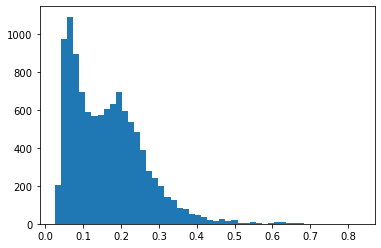

In [33]:
print(sub_esmb.mean())
dfsub.target = sub_esmb

display(dfsub.head(3))
plt.hist(dfsub.target, bins=50);

In [34]:
dfsub.to_csv(f'{p_esmb}/submission_{PRFX_ESMB}.csv', index=False)